In [1]:
import sys; sys.path.append('../code')

import matplotlib.pyplot as plt
plt.rcParams['font.serif'] = ['Times'] + plt.rcParams['font.serif']

plt.rcParams['text.usetex'] = False
#plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rcParams["ps.usedistiller"] = 'xpdf'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams["mathtext.fontset"] = 'cm'

from plot_utility import mathify_ticklabels

/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/total_variation_regularization/__total_variation_regularization__.py:12: UserWarning: Could not import cvxpy. Install cvxpy (http://www.cvxpy.org/install/index.html) to use                    convex total variation regularized derivatives.                    Recommended solver: MOSEK, free academic license available: https://www.mosek.com/products/academic-licenses/                    You can still use the iterative method.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:22: UserWarning: Could not import pychebfun. Install pychebfun (https://github.com/pychebfun/pychebfun/) to use chebfun derivatives.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:26: UserWarning: Could not import pydmd. Install pydmd (florisvb fork: https://github.com/florisvb/PyDMD) to 

In [2]:
import matplotlib.pyplot as plt
import utility
import numpy as np
import figurefirst as fifi
import pandas
import os
import matplotlib
import fly_plot_lib.plot as fpl

import scipy.interpolate
interp2d = scipy.interpolate.interp2d

try:
    import run_analysis
except:
    import run_analysis_180 as run_analysis

probably could not import cvxpy, not an issue if you dont need it here


In [3]:
import matplotlib
print('matplotlib version: ', matplotlib.__version__)
print('numpy version: ', np.__version__)

matplotlib version:  3.5.0
numpy version:  1.18.0


In [4]:
fififig = '../figures_svg/fig_10_summary.svg'
FONTSIZE = 7

In [5]:
from plot_utility import load_real_wind, get_filenames_sorted_by_tau_and_T, plot_error_heatmap
from plot_utility import get_optimal_psifreq_tau_vs_noise, plot_example_zeta_timeseries
from plot_utility import get_error_heatmap_for_Tmultiplier

In [6]:
import direct_trajectory_simulator

In [7]:
directories = {'constant': '../data_simulations/20220301_seed1_absine_alignpsi_realconstant',
               'dynamic': '../data_simulations/20220301_seed1_absine_alignpsi_realdynamic',
               'constantvel': '../data_simulations/20220301_seed1_constant_alignpsi_realdynamic',
               'constantgamma': '../data_simulations/20220301_seed1_absine_aligngamma_realdynamic',
              }

basenames = {  'constant': 'cvx_windrealconstant_random_turnamplitude',
               'dynamic': 'cvx_windrealdynamic_random_turnamplitude',
               'constantvel': 'cvx_windrealdynamic_random_turnamplitude',
               'constantgamma': 'cvx_windrealdynamic_random_turnamplitude',
              }

In [8]:
def plot_trajectory(option, ax):
    if option == 'constantvel':
        velocity_profile='constant'
    else:
        velocity_profile='absine'
    
    if option == 'constantgamma':
        phi='align_gamma'
    else:
        phi='align_psi'
        
    psi_freq = 0.1
    smoothness_weight = 1
    turn_amplitude = '180deg'
    df, bmp = run_analysis.get_df_random( wind='realdynamic', 
                       L=300, 
                       psi_freq=psi_freq,
                       dt=0.1,
                       t=None,
                       turn_amplitude=turn_amplitude,
                       smoothness_weight=smoothness_weight,
                       angular_noise_std=0,
                       of_noise_std=0,
                       air_noise_std=0,
                       velocity_profile=velocity_profile,
                       phi=phi,
                       random_seed=7)

    direct_trajectory_simulator.plot_trajec(df, ax=ax, size_radius=0.4, nskip = 3, 
                                            show_wind_quivers=False)

    xmean = df.xpos.mean()
    ymean = df.ypos.mean()

    x = 4
    y = 4
    ax.set_xlim(xmean-x, xmean+x)
    ax.set_ylim(ymean-y, ymean+y)

In [9]:
def plot_summary(option, layout):
    if option == 'constantgamma':
        show_ticklabels = True
        phi_alignment = 'aligngamma'
    else:
        show_ticklabels = False
        phi_alignment = 'alignpsi'
        
    if option == 'constant':
        windtype = 'constant'
    else:
        windtype = 'dynamic'
        
    
    
    angular_noise_stds = [0.3, 0.6, 1.2]
    directory = directories[option]
    
    turn_angle = 20
    basename = basenames[option] + str(turn_angle) + 'deg'
    df_noise_summary_20 = get_optimal_psifreq_tau_vs_noise(directory, 
                                                        basename, 
                                                        phi_alignment,
                                                        angular_noise_stds=angular_noise_stds, 
                                                        Tmultiplier=1, use='median')


    turn_angle = 90
    basename = basenames[option] + str(turn_angle) + 'deg'
    df_noise_summary_90 = get_optimal_psifreq_tau_vs_noise(directory, 
                                                        basename, 
                                                        phi_alignment,
                                                        angular_noise_stds=angular_noise_stds, 
                                                        Tmultiplier=1, use='median')

    turn_angle = 180
    basename = basenames[option] + str(turn_angle) + 'deg'
    df_noise_summary_180 = get_optimal_psifreq_tau_vs_noise(directory, 
                                                        basename, 
                                                        phi_alignment,
                                                        angular_noise_stds=angular_noise_stds, 
                                                        Tmultiplier=1, use='median')



    ax_freq = layout.axes[(option, 'optimal_freq')]
    ax_tau = layout.axes[(option, 'optimal_tau')]
    ax_error = layout.axes[(option, 'optimal_error')]

    
    xticks = angular_noise_stds
    
    for i, df_noise_summary in enumerate([df_noise_summary_20, 
                                              df_noise_summary_90, 
                                              df_noise_summary_180]):
        color = ['purple', 'blue', 'green'][i]
        offset = [-0.025, 0, 0.025][i]

        # Optimal frequency
        ax_freq.plot(df_noise_summary.angular_noise_std.values+offset, df_noise_summary.optimal_psiqfreq_values.values, 
                     '.', color=color)
        ax_freq.plot(df_noise_summary.angular_noise_std.values+offset, df_noise_summary.optimal_psiqfreq_values.values, 
                     color=color)
        ax_freq.vlines(df_noise_summary.angular_noise_std.values+offset, 
                       df_noise_summary.optimal_freq_ellipse_min,
                       df_noise_summary.optimal_freq_ellipse_max, 
                       colors=color,
                       alpha=0.5)


        #ax_freq.set_xlabel(r'Noise level')
        #ax_freq.set_ylabel(r'Optimal turning frequency, Hz')

        ax_freq.set_yscale('log')
        yticks = [0.01, 0.02, 0.1, 0.5, 1.25]
        ax_freq.set_ylim(0.01, 1.5)
        fifi.mpl_functions.adjust_spines(ax_freq, ['left', 'bottom'], 
                                         yticks = yticks,
                                         xticks = xticks,
                                         spine_locations={'left': 5, 'bottom': 5},
                                         default_ticks=False,
                                         tick_length=2.5,
                                         linewidth=0.5)
        ax_freq.minorticks_off()
        if show_ticklabels:
            mathify_ticklabels(ax_freq, 'x', xticks)
            mathify_ticklabels(ax_freq, 'y', yticks)
        else:
            ax_freq.set_yticklabels([])
            ax_freq.set_xticklabels([])
        fifi.mpl_functions.set_fontsize(ax_freq, FONTSIZE)

        # Optimal tau
        ax_tau.plot(df_noise_summary.angular_noise_std.values+offset, df_noise_summary.optimal_tau_values.values, 
                     '.', color=color)
        ax_tau.plot(df_noise_summary.angular_noise_std.values+offset, df_noise_summary.optimal_tau_values.values, 
                     color=color)
        ax_tau.vlines(df_noise_summary.angular_noise_std.values+offset, 
                       df_noise_summary.optimal_tau_ellipse_min,
                       df_noise_summary.optimal_tau_ellipse_max, 
                       colors=color,
                       alpha=0.5)

        #ax_freq.set_xlabel(r'Noise level')
        

        ax_tau.set_yscale('log')
        yticks = [0.4, 2, 10, 50, 250]
        ax_tau.set_ylim(0.4, 600)
        fifi.mpl_functions.adjust_spines(ax_tau, ['left', 'bottom'], 
                                         yticks = yticks,
                                         xticks = xticks,
                                         spine_locations={'left': 5, 'bottom': 5},
                                         default_ticks=False,
                                         tick_length=2.5,
                                         linewidth=0.5)
        ax_tau.minorticks_off()
        ax_tau.set_yticklabels(yticks)
        
        if show_ticklabels:
            #ax_tau.set_yticklabels(yticks)
            #ax_tau.set_xticklabels(xticks)
            mathify_ticklabels(ax_tau, 'x', xticks)
            mathify_ticklabels(ax_tau, 'y', yticks)
        else:
            ax_tau.set_yticklabels([])
            ax_tau.set_xticklabels([])
        fifi.mpl_functions.set_fontsize(ax_tau, FONTSIZE)

        # Error

        ax_error.plot(df_noise_summary.angular_noise_std.values+offset, df_noise_summary.optimal_error_values.values, 
                     '.', color=color)
        ax_error.plot(df_noise_summary.angular_noise_std.values+offset, df_noise_summary.optimal_error_values.values, 
                     color=color)
        ax_error.vlines(df_noise_summary.angular_noise_std.values+offset, 
                       df_noise_summary.optimal_error_values.values - 5*np.pi/180.,
                       df_noise_summary.optimal_error_values.values + 5*np.pi/180., 
                       colors=color,
                       alpha=0.5)

        #ax_error.set_xlabel('Noise level')
        #ax_error.set_ylabel('Median error')
        yticks_deg = [0, 10, 20, 30, 40]
        fifi.mpl_functions.adjust_spines(ax_error, ['left', 'bottom'], 
                                         yticks = np.array(yticks_deg)*np.pi/180.,
                                         xticks = xticks,
                                         spine_locations={'left': 5, 'bottom': 5},
                                         default_ticks=False,
                                         tick_length=2.5,
                                         linewidth=0.5)
        ax_error.set_ylim(0, 45*np.pi/180.)

        if show_ticklabels:
            ax_error.set_yticklabels([r'$'+str(ytick)+r'^{\circ}$' for ytick in yticks_deg])
            mathify_ticklabels(ax_error, 'x', xticks)
        else:
            ax_error.set_yticklabels([])
            ax_error.set_xticklabels([])
        if option == 'constantgamma':
            ax_error.set_xlabel('Noise level')
        fifi.mpl_functions.set_fontsize(ax_error, FONTSIZE)
        
        
        if 0:
            ax_tau.set_ylabel(r'$\tau$, sec')
            ax_freq.set_ylabel(r'Optimal turning\nfrequency, Hz')
            ax_error.set_ylabel('Median error')
        

    return layout

In [10]:
def plot_all_summary_panels(option):
    if option == 'constantgamma':
        show_yspine = True
        show_xspine = True
        phi_alignment = 'aligngamma'
    else:
        show_yspine = False
        show_xspine = False
        phi_alignment = 'alignpsi'
        
    if option == 'constant':
        windtype = 'realconstant'
    else:
        windtype = 'realdynamic'

    turn_angle = 180
    noise = 0.3
    directory = directories[option]
    basename= basenames[option] + str(turn_angle) + 'deg'

    layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

    # TRAJECTORY
    ax = layout.axes[(option, 'trajec')]
    plot_trajectory(option, ax)

    # HEATMAP
    ax = layout.axes[(option, '180')]
    angular_noise_std = 0.6
    
    Tmultiplier = 1
    paramX = 1
    
    error_heatmap = get_error_heatmap_for_Tmultiplier(directory,  basename, 
                                          angular_noise_std=angular_noise_std,
                                          Tmultiplier=Tmultiplier,
                                          phi_alignment=phi_alignment,
                                          paramX=paramX)
    
    plot_error_heatmap(error_heatmap, directory, basename, angular_noise_std=angular_noise_std, 
                           Tmultiplier=1, paramX=paramX, use='median',
                           phi_alignment=phi_alignment,
                               show_xspine=show_xspine, show_yspine=show_yspine,
                               show_contour=False, ax=ax)
    ax.set_xlim(0.2, 350)
    #if option == 'constantgamma':
    #    ax.yaxis.set_label_coords(-.34, .6)
    
    # SUMMARY
    layout = plot_summary(option, layout)

    layout.append_figure_to_layer(layout.figures[option], option, cleartarget=True)
    layout.write_svg(fififig)
    
    
    # plot wind
    layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])
    ax = layout.axes[(option, '180')]

    df_real_dynamic_wind = pandas.read_hdf('../data_tmp/df_' + windtype + '_wind_percentiles.hdf5')
    ax.plot(df_real_dynamic_wind.lags, df_real_dynamic_wind.fifty, color='lightsteelblue', linewidth=2)
    ax.plot(df_real_dynamic_wind.lags, df_real_dynamic_wind.fifty, '--', color='blue', linewidth=0.5)
    ax.set_xscale('log')
    ax.set_xlim(0.2, 350)
    ax.set_ylim(0, 120)
    ax.minorticks_off()

    fifi.mpl_functions.adjust_spines(ax, [], 
                                     yticks = [0, 45, 90],
                                     spine_locations={'right': 5, 'bottom': 5},
                                     default_ticks=False,
                                     tick_length=2.5,
                                     linewidth=0.5,
                                     color='blue')

    #yticklabels = ['$' + str(y) + '^{\circ}$' for y in [0, 45, 90]]
    #ax.set_yticklabels(yticklabels)
    #ax.tick_params(axis='y', labelcolor='blue')
    #ax.set_ylabel('Median change in $\zeta$', color='blue', rotation=270)
    #ax.yaxis.set_label_position("right")

    fifi.mpl_functions.set_fontsize(ax, FONTSIZE)
    
    for tag in ['optimal_tau', 'trajec', 'optimal_freq', 'optimal_error']:
        ax = layout.axes[(option, tag)]
        ax.set_frame_on(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    

    layout.append_figure_to_layer(layout.figures[option], option, cleartarget=False)
    layout.write_svg(fififig)

# Plot summary for option

300 0.09999990463256836
Number of turns per sec:  0.16722423974502104
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[0.48842318 0.31815788 0.2838376  0.28354499 0.20341337]
 [0.31102864 0.22998653 0.19688527 0.21501

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  3.0931979192510775 -2.2083205315812515
means:  3.0902516588714115 -2.2086158982554447
21.98260939839032 0.10985259050182798 0.17017695655254594
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.099

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  4.458324057212017 -0.49055903801440753
means:  4.457113957508241 -0.49055905669895494
86.23826231148004 0.6122839970134246 0.1700922544930612
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  5.26661953125424 -0.4920775073549676
193.75985496090127 0.6113549794886309 0.2167975036101113
[0.3, 0.6, 1.2] [0.6126841653448004, 0.6122839970134246, 0.6113549794886309] [0.18636877419323516, 0.1700922544930612, 0.2167975036101113] [38.46577054091795, 86.23826231148004, 193.75985496090127]
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames containi

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.4225066027107065 -2.1317065660809567
means:  2.4189839185797237 -2.1313361255875916
11.234438409444461 0.11867861833215071 0.1470767490075361
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.099

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  3.147728842649654 -2.2057505357337477
means:  3.1446701317596086 -2.204941758712052
23.21201730295655 0.11025694662406704 0.1680923122769582
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.099999

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  3.171869985229066 -2.8517093961655027
23.85204565201335 0.05774552647797722 0.18087979914417884
[0.3, 0.6, 1.2] [0.11867861833215071, 0.11025694662406704, 0.05774552647797722] [0.1470767490075361, 0.1680923122769582, 0.18087979914417884] [11.234438409444461, 23.21201730295655, 23.85204565201335]
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames con

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.417987716218074 -2.25648260003275
means:  2.414364404786088 -2.2563210509584297
11.182660452818737 0.10473509191191302 0.135915319151102
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.5901674921865054 -2.385978449400988
means:  2.5867580138947117 -2.3865178693132147
13.2866266443396 0.09194930657259426 0.1634688132619566
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
only finding filenames containing: alignpsi
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.09999990463256836
7000 0.099999

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  3.1424437716822204 -2.811817900987562
means:  3.1393060941181647 -2.812810821394527
23.08784051064744 0.060036004520323254 0.1831205636888269
[0.3, 0.6, 1.2] [0.10473509191191302, 0.09194930657259426, 0.060036004520323254] [0.135915319151102, 0.1634688132619566, 0.1831205636888269] [11.182660452818737, 13.2866266443396, 23.08784051064744]
300 0.09999990463256836
Number of turns per sec:  0.16722423974502104
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099999904

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.7246907735669614 -1.4543161366527337
means:  2.7222535481537116 -1.4546742322451636
15.214570407569527 0.23347641059978602 0.2587799661994059
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099999904632

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099999904632

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.846993017071908 -2.2181024426394367
17.235875855025593 0.10881539649828072 0.3808178551404286
[0.3, 0.6, 1.2] [0.26770937037553916, 0.27231579881971824, 0.10881539649828072] [0.21065422245856963, 0.2628647687378803, 0.3808178551404286] [3.5457735088326894, 10.608662684145393, 17.235875855025593]
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


3.546015173300164 0.2677180697489272 0.19438583663380316
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099999904632568

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.260764565027315 -1.5162654949211325
means:  2.257854938994053 -1.5166953010783266
9.5625548873909 0.2194358594859313 0.23841594279684267
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


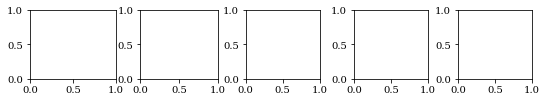

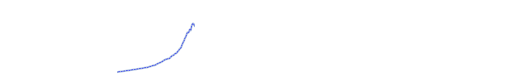

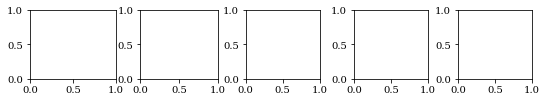

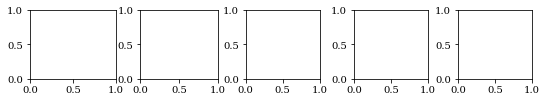

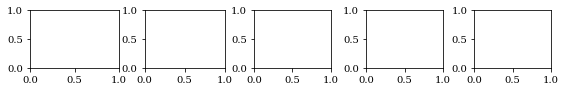

In [11]:
plot_all_summary_panels('constant')
plot_all_summary_panels('dynamic')

300 0.09999990463256836
Number of turns per sec:  0.16722423974502104
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[0.89010584 0.71402714 0.65433979 0.4222902  0.41436168]
 [0.71312167 0.59

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.7241144890798377 -1.454312107247736
means:  2.721678201509264 -1.4546707098825296
15.205819273248109 0.233477232989819 0.24952217292735798
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.0

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099999904632

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099999904632

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  4.458021924531003 -0.667506895792618
86.31659936810944 0.5129859121970589 0.5961249774810481
[0.3, 0.6, 1.2] [1.0483940274353192, 0.7498053514147067, 0.5129859121970589] [0.35963925836115695, 0.43007899053409426, 0.5961249774810481] [29.715299364442252, 44.24034326404093, 86.31659936810944]
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only f

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  1.268225818018862 -1.3175645278756833
means:  1.265796205369241 -1.3176982406093993
3.545914888926714 0.2677508913532502 0.21060250811360257
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.0

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.01001353582252 -1.2731269175850308
7.463418370141929 0.2799548559434515 0.25116775189273705
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
1500

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  1.2681558746709778 -1.3178499317695525
means:  1.2657262856234874 -1.3179834028046395
3.5456669681265964 0.2676745498066732 0.19078548796870887
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  3.652469866890543 -2.009296982432279
means:  3.6504651130223866 -2.009297335213594
38.49256527950342 0.1340828568776577 0.3886561016950858
[0.3, 0.6, 1.2] [0.2676745498066732, 0.21734703245387274, 0.1340828568776577] [0.19078548796870887, 0.2310510331964416, 0.3886561016950858] [3.5456669681265964, 4.68044734829963, 38.49256527950342]
300 0.09999990463256836
Number of turns per sec:  0.16722423974502104
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.7240931738075913 -1.4541971999080907
means:  2.721657383828483 -1.45455576828274
15.20550272665136 0.233504070778853 0.23725783108802245
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


0.04654955993785056
193.34172227111478 1.0476499992507946 0.31326504334766514
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.0999999046325683

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  4.4561839600737665 0.047760896104126135
86.1580982307493 1.048919824521852 0.38041131402471196
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.852557036755692 -2.008477962472967
means:  2.8498259929360157 -2.008478404043004
17.284773906115273 0.1341927064820899 0.6965618834594154
[0.3, 0.6, 1.2] [1.0476499992507946, 1.048919824521852, 0.1341927064820899] [0.31326504334766514, 0.38041131402471196, 0.6965618834594154] [193.34172227111478, 86.1580982307493, 17.284773906115273]
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.0999999046325683

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  1.8949652974309215 -1.186549128896833
6.652317548117992 0.30527290593247963 0.24932398850198034
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.0999999046325683

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.0999999046325683

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.0318931426630162 -1.5171051207473862
means:  2.029047369222524 -1.5170903491563987
7.606836399587652 0.21934918889203425 0.23339746800619576
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
150

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.2658959713473865 -2.1908427547586924
means:  2.262737209613588 -2.191674893773047
9.609356023105398 0.11172945684266725 0.345691929143647
[0.3, 0.6, 1.2] [0.2677234267037328, 0.21934918889203425, 0.11172945684266725] [0.19492542074770558, 0.23339746800619576, 0.345691929143647] [3.546311920637848, 7.606836399587652, 9.609356023105398]


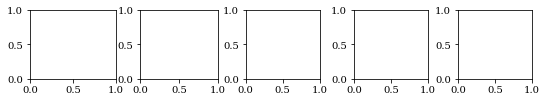

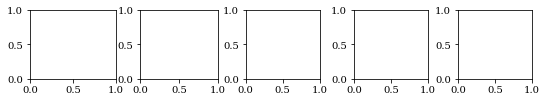

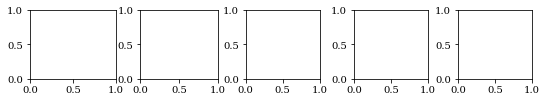

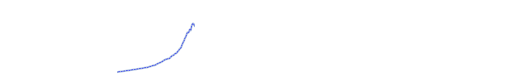

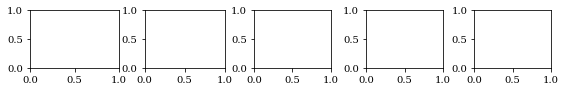

In [12]:
plot_all_summary_panels('constantvel')
plot_all_summary_panels('constantgamma')

# Display

300 0.09999990463256836
Number of turns per sec:  0.16722423974502104
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[0.78542394 0.62097948 0.56633564 0.40896091 0.42193037]
 [0.69871383 

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


15.20550272665136 0.233504070778853 0.23725783108802245
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099999904632

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  5.264751988372328 0.04654950781940313
means:  5.264459204988481 0.04654955993785056
193.34172227111478 1.0476499992507946 0.31326504334766514
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
1500

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.0999999046

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])



15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099999904

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


3.546311648098103 0.2678122575171926 0.2039572822157545
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.099999904632

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  1.8949652974309215 -1.186549128896833
6.652317548117992 0.30527290593247963 0.24932398850198034
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.0999999046325683

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


3.546311920637848 0.2677234267037328 0.19492542074770558
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.0318931426630162 -1.5171051207473862
means:  2.029047369222524 -1.5170903491563987
7.606836399587652 0.21934918889203425 0.23339746800619576
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: aligngamma
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
150

../code/plot_utility.py:465: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.2658959713473865 -2.1908427547586924
means:  2.262737209613588 -2.191674893773047
9.609356023105398 0.11172945684266725 0.345691929143647
[0.3, 0.6, 1.2] [0.2677234267037328, 0.21934918889203425, 0.11172945684266725] [0.19492542074770558, 0.23339746800619576, 0.345691929143647] [3.546311920637848, 7.606836399587652, 9.609356023105398]


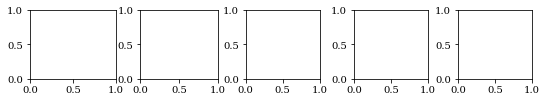

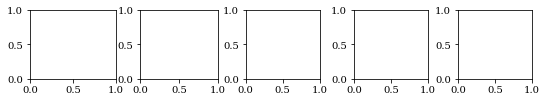

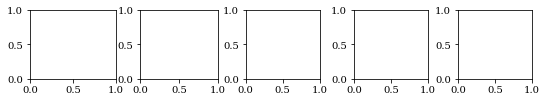

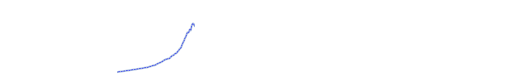

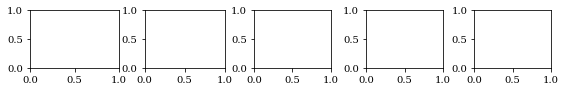

In [13]:
plot_all_summary_panels('constantgamma')

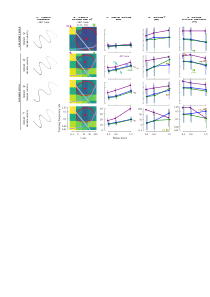

In [14]:
from IPython.display import display,SVG
display(SVG(fififig))